# Clustering analysis of functional connectome

In [39]:
import numpy as np
import pandas as pd
from nilearn import plotting
import matplotlib.pyplot as plt

import os
import glob

In [87]:
# shen atlas
atlas_filename = '/home/rj299/scratch60/ra_ptsd/shen_atlas/shen_1mm_268_parcellation.nii.gz'
atlas_labels = pd.read_csv('/home/rj299/scratch60/ra_ptsd/shen_atlas/shen_268_parcellation_networklabels.csv')
# colors = pd.read_csv('/home/or/Downloads/shenPar/shen_268_parcellation_networklabels_colors.csv')
coords = plotting.find_parcellation_cut_coords(labels_img=atlas_filename)

In [ ]:
# plot shen parcelation

In [40]:
# read run id
run_id = pd.read_csv('/home/rj299/scratch60/ra_ptsd/data_bids/derivatives/run_id.csv')

Read connectivity matrix

Individual scan run

In [33]:
conn_matrix = np.loadtxt('/home/rj299/scratch60/ra_ptsd/data_bids/derivatives/matrices/sub-1234ses-1_bis_matrix_1_matrix.txt')

In [23]:
conn_matrix.shape

(268, 268)

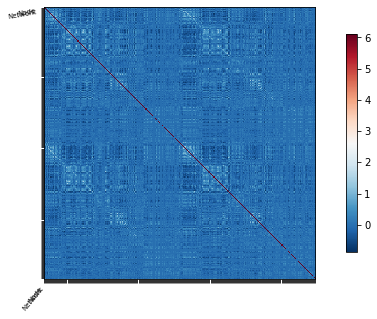

In [34]:
plotting.plot_matrix(conn_matrix, labels=atlas_labels,
#                      vmax=0.8, vmin=-0.8, 
                     colorbar=True)

In [35]:
np.fill_diagonal(conn_matrix, 0)

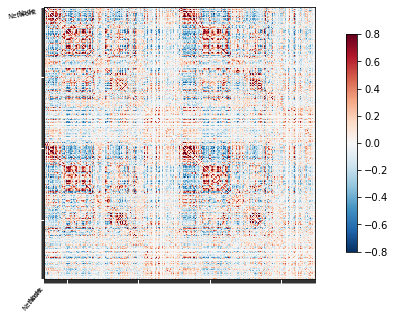

In [37]:
plotting.plot_matrix(conn_matrix, labels=atlas_labels,
                     vmax=0.8, vmin=-0.8, 
                     colorbar=True)

Visualize connectome based on the Shen parcelation

In [ ]:
# view connectome
plotting.view_connectome(conn_matrix, edge_threshold=0.8,
                         node_coords=coords)

Load singel subjects, average gains and losses

In [41]:
run_id.head()

,id,ses,run,type,isExcluded_behavior,isExcluded_imaging,scanner,isCompleteClinical_PCA,age,isMale,kbit,group,_merge
0,1005,1,1,g,0.0,0.0,3TA,1.0,29.9,1.0,120.0,R,both
1,1005,1,2,g,0.0,0.0,3TA,1.0,29.9,1.0,120.0,R,both
2,1005,1,3,l,0.0,0.0,3TA,1.0,29.9,1.0,120.0,R,both
3,1005,1,4,l,0.0,0.0,3TA,1.0,29.9,1.0,120.0,R,both
4,1005,1,5,r,0.0,0.0,3TA,1.0,29.9,1.0,120.0,R,both


In [62]:
# read all files from a subject
sub_id = 1234
sub_run_id = run_id.loc[run_id['id'] == sub_id,:]


all_file = glob.glob('/home/rj299/scratch60/ra_ptsd/data_bids/derivatives/matrices/sub-%s*_bis_matrix_*_matrix.txt' %sub_id)


In [84]:
# separate scan types

conn_matrix_gain = []
conn_matrix_loss = []

# gains
ses = np.array(sub_run_id.loc[sub_run_id['type']=='g','ses'])
run = np.array(sub_run_id.loc[sub_run_id['type']=='g','run'])
print('gains')
print(ses)
print(run)

for idx in range(len(ses)):
    filename = '/home/rj299/scratch60/ra_ptsd/data_bids/derivatives/matrices/sub-%sses-%s_bis_matrix_%s_matrix.txt' %(sub_id, ses[idx], run[idx])
    conn_matrix = np.loadtxt(filename)
    np.fill_diagonal(conn_matrix, 0)
    conn_matrix_gain.append(conn_matrix)
    
# losses
ses = np.array(sub_run_id.loc[sub_run_id['type']=='l','ses'])
run = np.array(sub_run_id.loc[sub_run_id['type']=='l','run'])
print('losses')
print(ses)
print(run)

for idx in range(len(ses)):
    filename = '/home/rj299/scratch60/ra_ptsd/data_bids/derivatives/matrices/sub-%sses-%s_bis_matrix_%s_matrix.txt' %(sub_id, ses[idx], run[idx])
    conn_matrix = np.loadtxt(filename)
    np.fill_diagonal(conn_matrix, 0)
    conn_matrix_loss.append(conn_matrix)

gains
[1 1 2 2]
[1 2 3 4]
losses
[1 1 2 2]
[3 4 1 2]


In [92]:
# averaging
conn_matrix_gain_mean = np.mean(conn_matrix_gain, axis=0)
conn_matrix_gain_mean.shape

conn_matrix_loss_mean = np.mean(conn_matrix_loss, axis=0)
conn_matrix_loss_mean.shape

(268, 268)

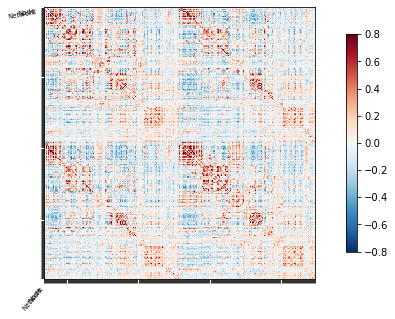

In [93]:
plotting.plot_matrix(conn_matrix_gain_mean, labels=atlas_labels,
                     vmax=0.8, vmin=-0.8, 
                     colorbar=True)